# Boston Housing Data 분석

- **CRIM**: Per capita crime rate by town.
- **ZN**: Proportion of residential land zoned for lots over 25,000 square feet.
- **INDUS**: Proportion of non-retail business acres per town.
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- **NOX**: Nitric oxide concentration (parts per 10 million).
- **RM**: Average number of rooms per dwelling.
- **AGE**: Proportion of owner-occupied units built prior to 1940.
- **DIS**: Weighted distances to five Boston employment centers.
- **RAD**: Index of accessibility to radial highways.
- **TAX**: Full-value property tax rate per $10,000.
- **PTRATIO**: Pupil-teacher ratio by town.
- **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town.
- **LSTAT**: Percentage of lower status of the population.

Target Variable:
- **MEDV**: Median value of owner-occupied homes in $1000s.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# housing.xls가 포함된 경로를 저장해봅시다.
PATH = '/content/drive/MyDrive/KUBIG_ML/'

In [4]:
# 본인 구글 드라이브에 업로드한 housing.xls 파일의 주소를 넣어주세요!
house = pd.read_excel(PATH+'housing.xls')

# Q1: `head`, `info`, `describe`, `shape` 함수를 실행해봅시다.

과제2 참고

In [5]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
house.shape

(506, 14)

# Q2: 각 변수의 결측치 (NaN 또는 Null)의 개수를 구해봅시다.

과제2 참고

In [9]:
# NaN의 개수 구하기
house.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


# Q3: 각 변수별로 히스토그램을 그리고, Scatterplot Matrix를 그려봅시다

과제2 참고

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

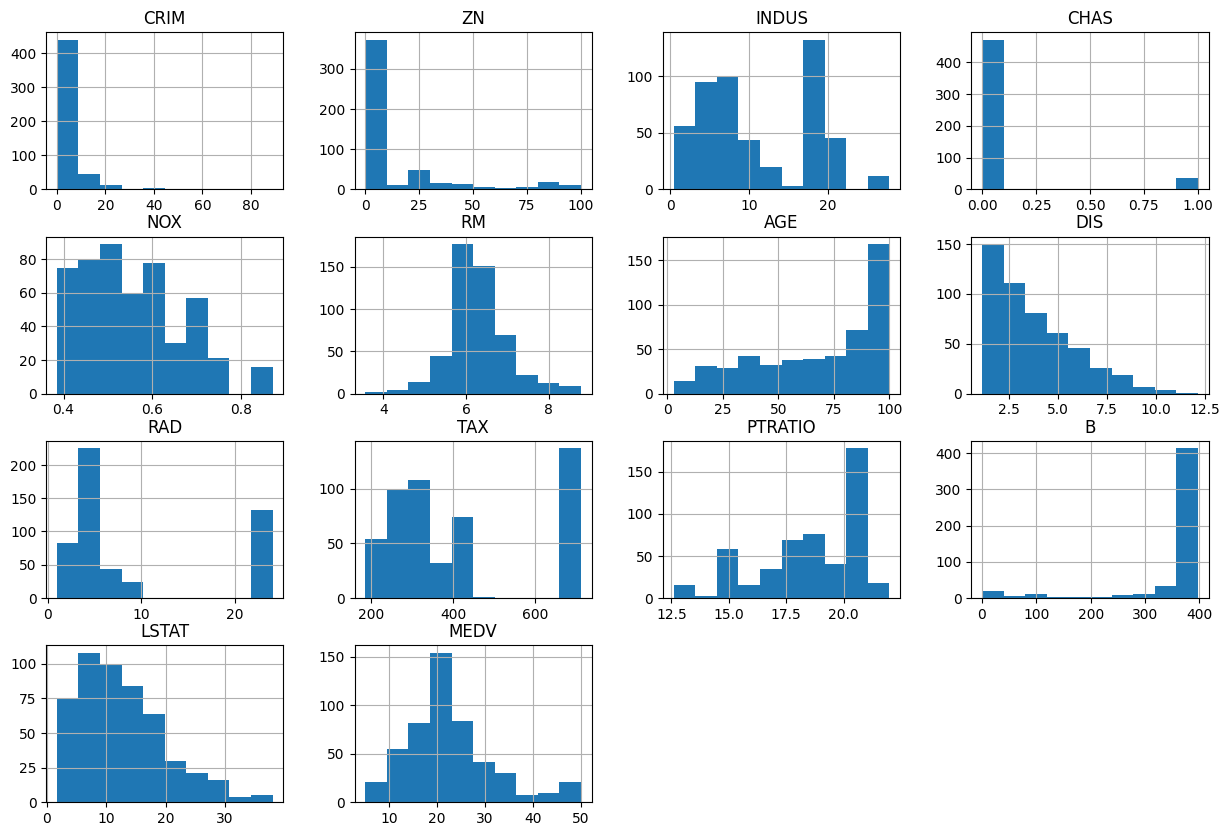

In [10]:
# Histogram
house.hist(figsize=(15,10))

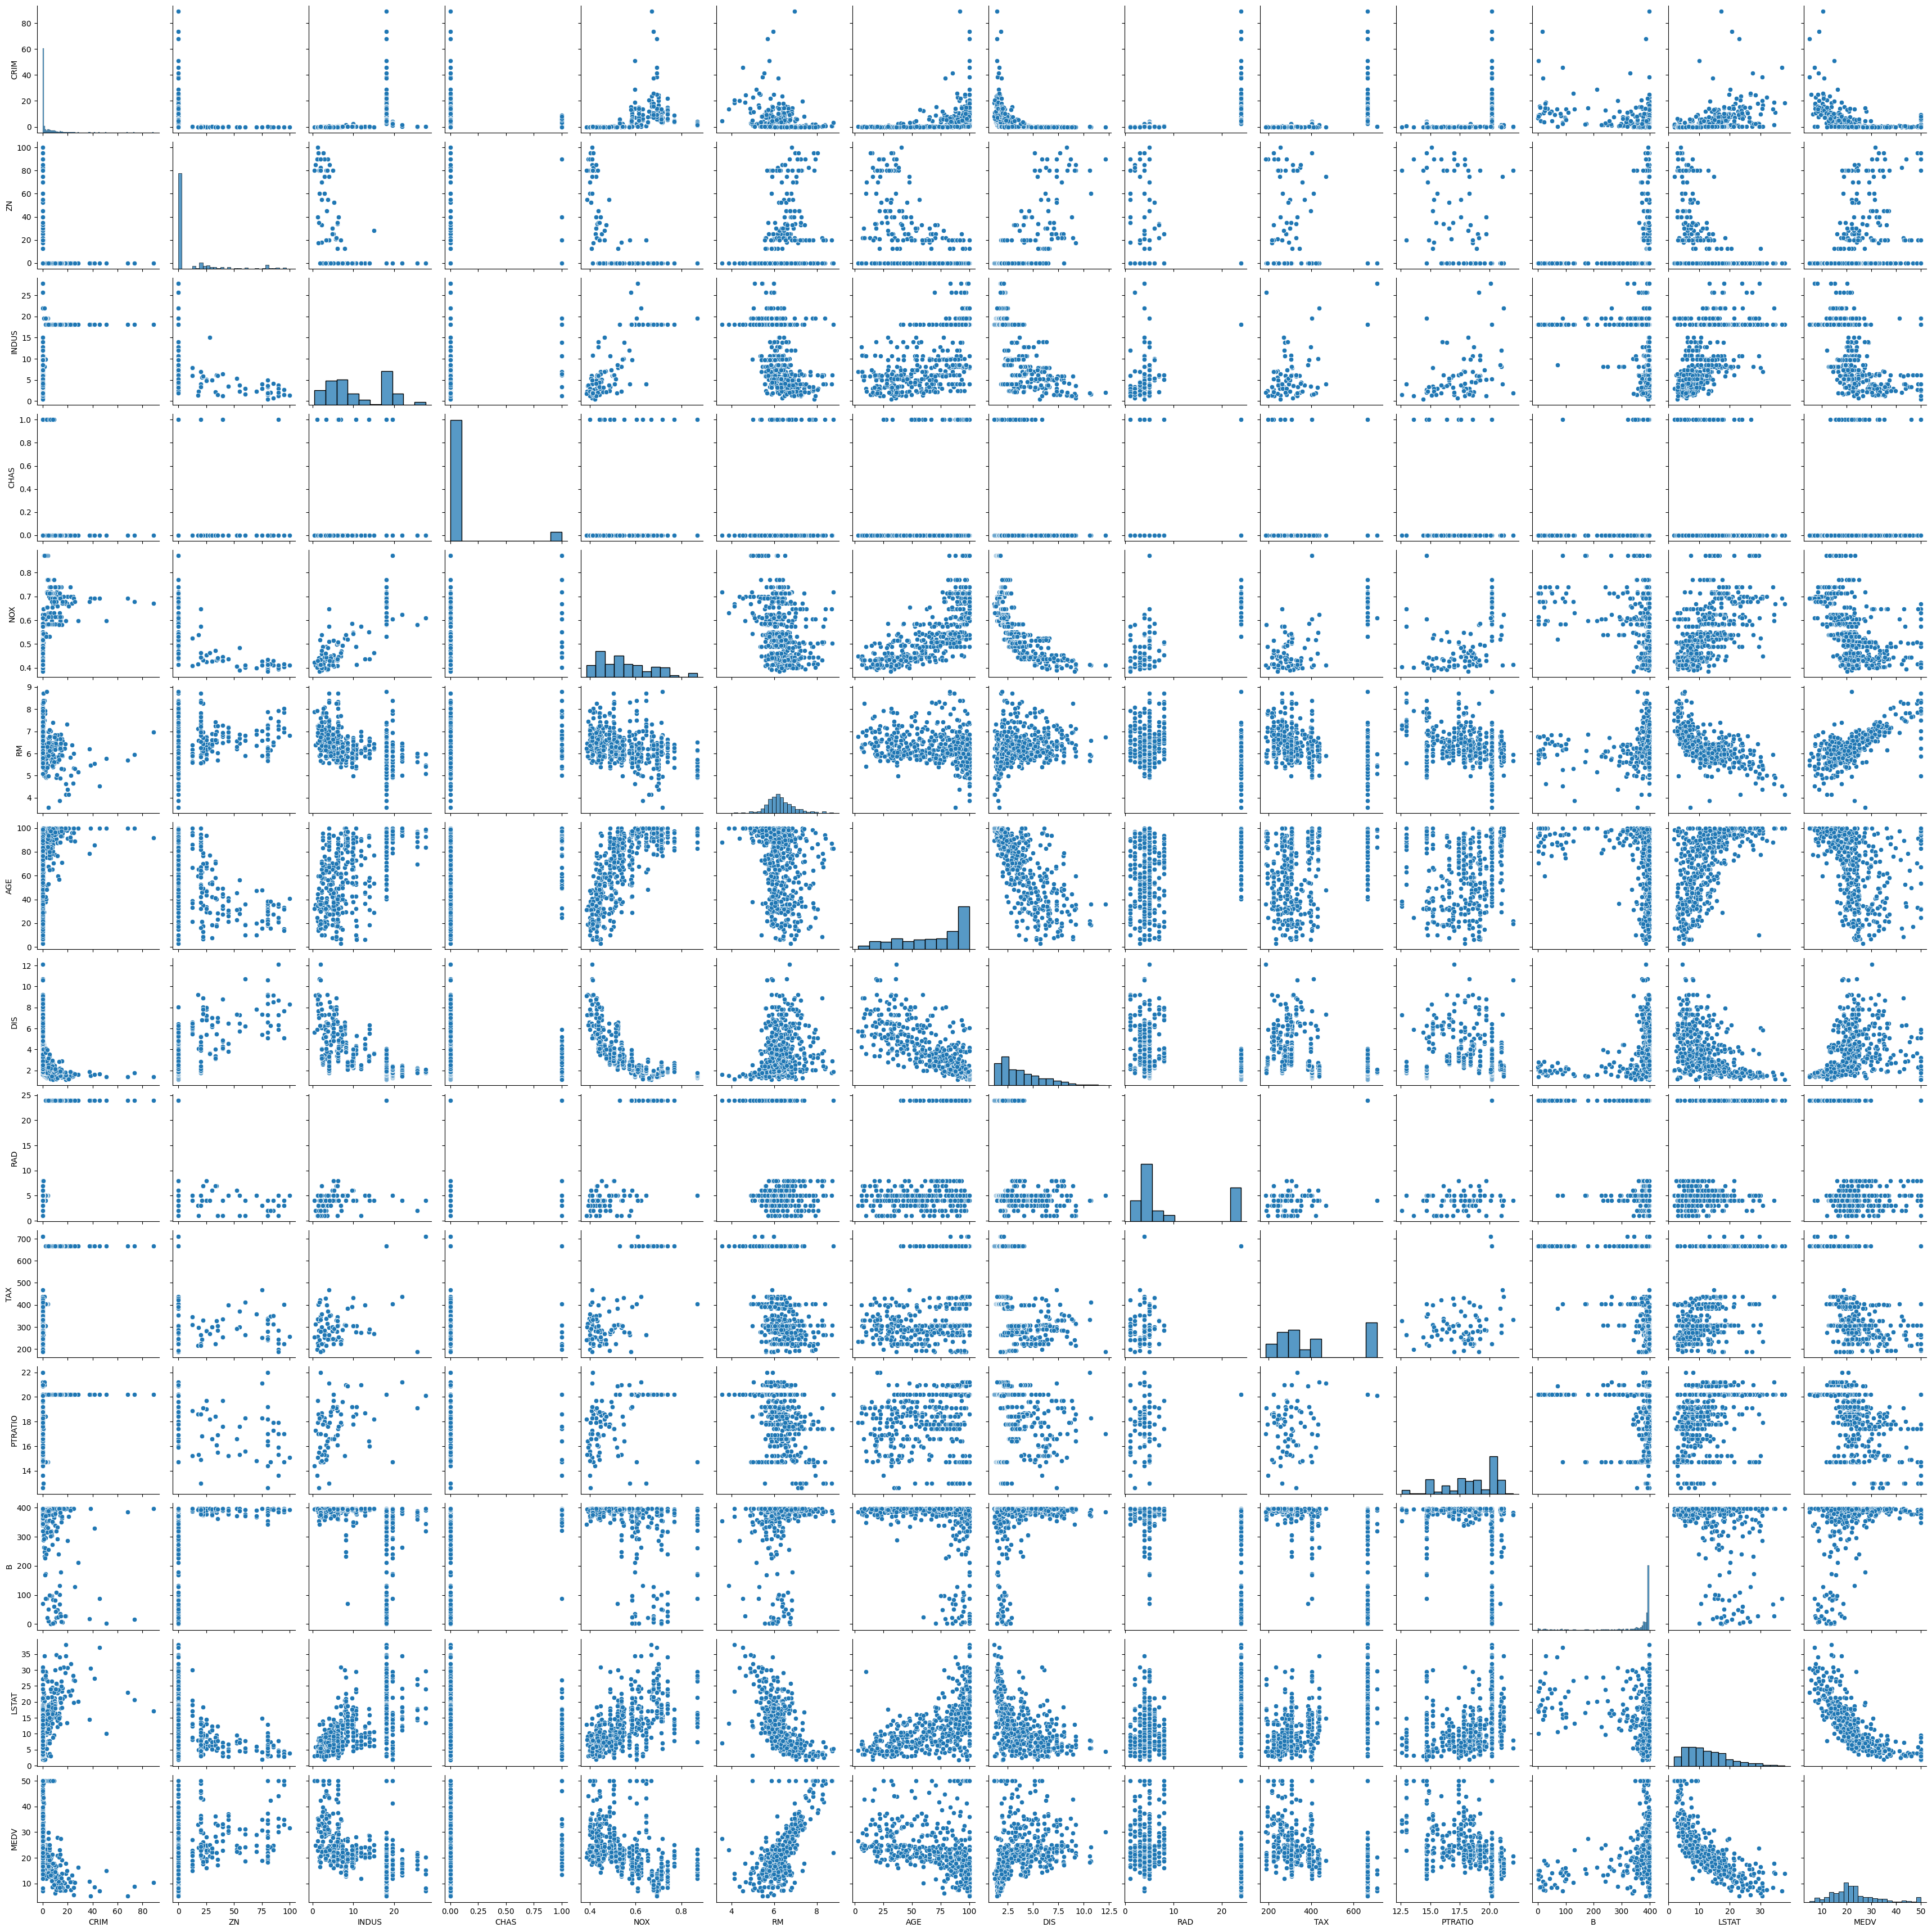

In [11]:
# Scatterplot Matrix
sns.pairplot(house)

# Q4: 데이터를 `X_train`, `X_test`, `y_train`, `y_test` 로 split해 봅시다

split 비율은 자유롭게 정해보시기 바랍니다.

In [12]:
X = house.drop('MEDV', axis=1)
y = house['MEDV']

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


# Q5: `StandardScaler`로 표준화를 해봅시다

CRIM, ZN, INDUS, NOX, RM, AGE, DIS, TAX, PTRATIO, B, LSTAT 변수들만 `StandardScaler`을 해봅시다.

`X_train`은 `fit_transform`, `X_test`는 `transform`을 이용하는 것에 유의합시다!

In [13]:
# StandardScaler
scaler = StandardScaler()


var_scale= ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# X_train에 대해 fit_transform 적용
X_train_scaled = X_train.copy()
X_train_scaled[var_scale] = scaler.fit_transform(X_train[var_scale])

# X_test에 대해 transform만 적용
X_test_scaled = X_test.copy()
X_test_scaled[var_scale] = scaler.transform(X_test[var_scale])

In [14]:
X_train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
379,1.892434,-0.495778,1.035280,0,1.019549,-0.074765,1.128863,-1.175156,24,1.543468,0.813975,0.387891,1.262678
311,-0.327672,-0.495778,-0.161802,0,-0.077387,-0.218185,-0.552953,-0.561852,4,-0.600514,-0.039554,0.424998,-0.910043
157,-0.271356,-0.495778,1.251338,0,0.449488,0.947639,1.036220,-0.934960,5,-0.014176,-1.794031,0.031976,-1.101188
244,-0.403642,0.460073,-0.751584,0,-1.053401,-0.969368,0.291518,2.036988,7,-0.446526,0.292374,0.138363,-0.013452
56,-0.427763,3.197285,-1.499030,0,-1.234784,0.152436,-1.162254,2.639779,2,-0.547210,-0.561155,0.424998,-0.938921
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,-0.427128,1.893851,-1.055234,0,-0.595625,0.596898,-0.424679,0.950039,5,-0.209622,-0.418901,0.424998,-0.745026
359,0.123583,-0.495778,1.035280,0,1.874641,-0.232385,0.462550,-0.626009,24,1.543468,0.813975,0.352664,0.009926
323,-0.393522,-0.495778,-0.529685,0,-0.517889,-0.806067,0.213129,0.455659,5,-0.701198,0.529465,0.357243,-0.117963
280,-0.425783,0.373178,-1.120927,0,-0.950617,2.192983,-0.136062,0.442750,5,-1.121703,-1.699194,0.312387,-1.215324


In [15]:

X_test_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
198,-0.425536,2.980046,-1.385161,0,-1.286608,1.417661,-1.069612,1.721143,2,-0.452449,-2.789815,0.369808,-0.822034
229,-0.372998,-0.495778,-0.701948,0,-0.422879,0.392417,-1.671787,-0.202535,8,-0.582746,-0.513737,0.230542,-1.215324
502,-0.424549,-0.495778,0.134549,0,0.173094,-0.221025,0.298645,-0.734372,1,-0.784115,1.193321,0.424998,-0.483750
31,-0.254306,-0.495778,-0.418736,0,-0.129211,-0.289185,1.128863,0.188616,4,-0.582746,1.193321,0.188151,0.060806
315,-0.397469,-0.495778,-0.161802,0,-0.077387,-0.810327,0.334276,0.076146,4,-0.600514,-0.039554,0.419361,-0.150966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.169088,-0.495778,1.251338,0,0.449488,2.347764,0.993462,-0.852514,5,-0.014176,-1.794031,0.100904,-1.223575
401,1.420429,-0.495778,1.035280,0,1.209569,0.095636,1.128863,-1.083224,24,1.543468,0.813975,0.424998,1.061908
368,0.206388,-0.495778,1.035280,0,0.674057,-1.854031,1.128863,-1.201367,24,1.543468,0.813975,0.173943,-1.284081
140,-0.392614,-0.495778,1.588565,0,0.613596,-0.144345,0.900820,-1.064740,4,0.187192,1.288157,0.321429,1.589962


# Q6: 5-fold Cross-Validation으로 `LinearRegression`을 적합해봅시다.

각 fold마다 적합 후 MSE, MAE, RMSE, $R^2$를 구하고, coefficient과 intercept를 `print` 해보세요.

In [16]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold

# KFold 객체 생성
kfold = KFold(n_splits=5, shuffle=True, random_state=100)

In [17]:

# LinearRegression 모델 생성
lr2 = LinearRegression()

# 교차 검증 수행
fold = 0
for train_index, test_index in kfold.split(X):  # split 안한 데이터 사용
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scaling 필요하면 이 단계에 넣기
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 모델 학습
    lr2.fit(X_train_scaled, y_train)

    # 예측
    pred = lr2.predict(X_test_scaled)

    # 성능 지표 계산
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)

    fold += 1
    # 결과 출력
    print(f"Fold {fold}:")
    print(f"  MSE = {mse}")
    print(f"  MAE = {mae}")
    print(f"  RMSE = {rmse}")
    print(f"  R² = {r2}")
    print(f"  Coefficients = {lr2.coef_}")
    print(f"  Intercept = {lr2.intercept_}\n")

Fold 1:
  MSE = 23.616994100563627
  MAE = 3.2484820876164178
  RMSE = 4.859731895955129
  R² = 0.7555033086871306
  Coefficients = [-0.6267902   1.10571261 -0.03747975  0.815164   -1.86828022  2.58622373
 -0.23897981 -3.10308338  2.47477171 -2.0465258  -1.94895468  0.81197395
 -3.53342566]
  Intercept = 22.621039603960405

Fold 2:
  MSE = 31.290753561367517
  MAE = 3.6754967434275363
  RMSE = 5.593813865455975
  R² = 0.6375829566735745
  Coefficients = [-0.79557923  0.80492518  0.22524902  0.35678415 -1.80863792  2.86032049
 -0.16034394 -2.97765115  2.78782613 -2.70031277 -2.20378796  0.91147076
 -3.60050212]
  Intercept = 22.47679012345679

Fold 3:
  MSE = 19.360377964719298
  MAE = 3.3318353272934096
  RMSE = 4.400042950326656
  R² = 0.7591168014965056
  Coefficients = [-1.00005795  1.22494812 -0.2445154   0.70932883 -2.07996288  2.55111666
  0.0783429  -3.25196762  2.56523885 -1.9039332  -1.98099075  0.88583808
 -3.71509122]
  Intercept = 22.69111111111112

Fold 4:
  MSE = 20.54222

# Q7: `GridSearchCV`를 이용하여 `Lasso`를 적합해봅시다.

찾아야 하는 최적 파라미터는

- `alpha`: 0.01, 0.1, 1, 10 중에서 찾기
- `fit_intercept`: `True`, `False`에서 찾기

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

위 링크를 참조하여 `GridSearCV`의 `scoring`을 3가지 이상 사용해보세요

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# param_grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'fit_intercept': [True, False]
}

# Lasso 모델과 GridSearchCV 설정
lasso = Lasso()


# Scoring 방법 설정
scoring = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'R2': make_scorer(r2_score)
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring=scoring, refit='R2', cv=5, verbose=1)

# 모델 적합 (X_train_scaled과 y_train을 사용)
grid_search.fit(X_train_scaled, y_train)

# 최적 파라미터 및 결과 출력
print("Best parameters found: ", grid_search.best_params_)
print("Best MSE: ", grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_])
print("Best MAE: ", grid_search.cv_results_['mean_test_MAE'][grid_search.best_index_])
print("Best R2: ", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found:  {'alpha': 0.1, 'fit_intercept': True}
Best MSE:  -35.87590395027316
Best MAE:  -4.018001432346681
Best R2:  0.35472425630267906


# Q8(Optional): BONUS! `RandomizedSearchCV`를 이용하여 `Ridge`를 적합해 봅시다.

CV를 이용한 hyperparameter tuning의 또다른 방법은 `RandomizedSearchCV`입니다.
Tuning해야 하는 모수가 많을 경우 이 방법이 빠르다는 장점이 있습니다.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#

위 링크를 참조하거나 구글링을 하여 `Ridge`를 적합해보세요.

`n_iter`와, 파라미터 공간을 자유롭게 조정해보세요.

n_iter : n_iter로 설정한 만큼의 조합을 시도

In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import uniform

# Ridge 모델 설정
ridge = Ridge()

# 하이퍼파라미터 공간 설정
param_distributions = {
    'alpha': uniform(0.01, 10),  # 0.01에서 10까지의 범위에서 균등 분포로 샘플링
    'fit_intercept': [True, False]
}

# Scoring 방법 설정
scoring = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'R2': make_scorer(r2_score)
}

# RandomizedSearchCV 설정
random_search = RandomizedSearchCV(estimator=ridge, param_distributions=param_distributions,
                                   n_iter=20, scoring=scoring, refit='R2', cv=5, verbose=1, random_state=42)

# 모델 적합 (X_train_scaled과 y_train을 사용)
random_search.fit(X_train_scaled, y_train)

# 최적 파라미터 및 결과 출력
print("Best parameters found: ", random_search.best_params_)
print("Best MSE: ", random_search.cv_results_['mean_test_MSE'][random_search.best_index_])
print("Best MAE: ", random_search.cv_results_['mean_test_MAE'][random_search.best_index_])
print("Best R2: ", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'alpha': 9.74755518841459, 'fit_intercept': True}
Best MSE:  -38.0564413061122
Best MAE:  -4.181859929809941
Best R2:  0.26857770130103964


In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import uniform

# Ridge 모델 설정
ridge = Ridge()

# 하이퍼파라미터 공간 설정
param_distributions = {
    'alpha': uniform(1, 20),  # 0.01에서 10까지의 범위에서 균등 분포로 샘플링
    'fit_intercept': [True, False]
}

# Scoring 방법 설정
scoring = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'R2': make_scorer(r2_score)
}

# RandomizedSearchCV 설정
random_search = RandomizedSearchCV(estimator=ridge, param_distributions=param_distributions,
                                   n_iter=10, scoring=scoring, refit='R2', cv=5, verbose=1, random_state=42)

# 모델 적합 (X_train_scaled과 y_train을 사용)
random_search.fit(X_train_scaled, y_train)

# 최적 파라미터 및 결과 출력
print("Best parameters found: ", random_search.best_params_)
print("Best MSE: ", random_search.cv_results_['mean_test_MSE'][random_search.best_index_])
print("Best MAE: ", random_search.cv_results_['mean_test_MAE'][random_search.best_index_])
print("Best R2: ", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'alpha': 12.973169683940732, 'fit_intercept': True}
Best MSE:  -37.26074802933805
Best MAE:  -4.123189111360388
Best R2:  0.29153834583885624


In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import uniform

# Ridge 모델 설정
ridge = Ridge()

# 하이퍼파라미터 공간 설정
param_distributions = {
    'alpha': uniform(10, 500),
    'fit_intercept': [True, False]
}

# Scoring 방법 설정
scoring = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'R2': make_scorer(r2_score)
}

# RandomizedSearchCV 설정
random_search = RandomizedSearchCV(estimator=ridge, param_distributions=param_distributions,
                                   n_iter=30, scoring=scoring, refit='R2', cv=5, verbose=1, random_state=42)

# 모델 적합 (X_train_scaled과 y_train을 사용)
random_search.fit(X_train_scaled, y_train)

# 최적 파라미터 및 결과 출력
print("Best parameters found: ", random_search.best_params_)
print("Best MSE: ", random_search.cv_results_['mean_test_MSE'][random_search.best_index_])
print("Best MAE: ", random_search.cv_results_['mean_test_MAE'][random_search.best_index_])
print("Best R2: ", random_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found:  {'alpha': 162.30688458668536, 'fit_intercept': True}
Best MSE:  -33.93283194331495
Best MAE:  -3.9128676117439896
Best R2:  0.43506290269070674
